In [57]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(seed=42)


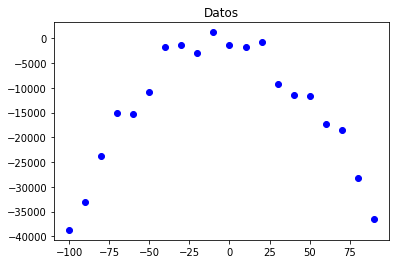

In [58]:
def f(x):  
    np.random.seed(42) 
    a1=-4
    a2=2
    a3=3
    y = a2*x + a1*x**2 + a3*1000*np.random.randn(x.shape[0])
    return y
    
X = np.array(np.arange(-100, 100, 10) )
y = f(X) 
plt.scatter(X,y,label='data', color='blue')
plt.title('Datos');


In [63]:
class PolynomailRegression() :
	
	def __init__( self, degree, learning_rate, iterations ) :
		self.degree = degree
		self.learning_rate = learning_rate
		self.iterations = iterations
		
	# function to transform X
	def transform( self, X ) :
		# initialize X_transform
		X_transform = np.ones( ( self.m, 1 ) )
		j = 0
		for j in range( self.degree + 1 ) :
			if j != 0 :
				x_pow = np.power( X, j )
				# append x_pow to X_transform
				X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
		return X_transform
	
	# function to normalize X_transform
	def normalize( self, X ) :
		X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
		return X
		
	# model training	
	def fit( self, X, Y ) :
		self.X = X
		self.Y = Y
		self.m = self.X.shape[0]
		self.n=1
	
		# weight initialization
		self.W = np.zeros( self.degree + 1 )
		# transform X for polynomial h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
		X_transform = self.transform( self.X )
		# normalize X_transform
		X_normalize = self.normalize( X_transform )	
		# gradient descent learning
		for i in range( self.iterations ) :
			h = self.predict( self.X )
			error = h - self.Y
			# update weights
			self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )
		return self
	
	# predict
	def predict( self, X ) :
		# transform X for polynomial h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
		X_transform = self.transform( X )
		X_normalize = self.normalize( X_transform )
		return np.dot( X_normalize, self.W )

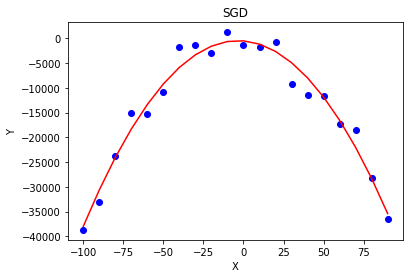

In [66]:
# Create dataset 
np.random.seed(42) 
a1=-4
a2=2
a3=3
X = np.arange(-100, 100, 10) 
Y = a2*X + a1*X**2 + a3*1000*np.random.randn(X.shape[0])
	

# model training

model = PolynomailRegression( degree = 2, learning_rate = 0.01, iterations = 500 )
model.fit( X, Y )
# Prediction on training set
Y_pred = model.predict( X )
# Visualization
plt.scatter( X, Y, color = 'b' )
plt.plot( X, Y_pred, color = 'r' )
plt.title( 'SGD' )
plt.xlabel( 'X' )
plt.ylabel( 'Y' )
plt.show()
